# Cross Validation Code Along

In [2]:
from seaborn import get_dataset_names, load_dataset


In [3]:
load_dataset('diamonds')['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [4]:

diamonds = load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
from seaborn import get_dataset_names, load_dataset
from sklearn.preprocessing import LabelBinarizer

diamonds = load_dataset('diamonds')

# 21551 diamonds are ideal, so almost half of the 53939
# We will change this into an ideal/not ideal binary problem

def make_ideal_not_ideal(element):
    if element == "Ideal":
        return 1
    else:
        return 0

lb = LabelBinarizer()
diamonds['cut'] = diamonds['cut'].apply(make_ideal_not_ideal)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,0,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# A little EDA

In [6]:
ideal = diamonds[diamonds['cut'] == 1]
not_ideal = diamonds[diamonds['cut'] == 0]

From .corr(), we can see there is a high pearson correlation between table and cut.  Although not built for categorical correlations, .corr() can still give a sense of predictive power.

In [7]:
diamonds.corr()

,carat,cut,depth,table,price,x,y,z
carat,1.000000,-0.163660,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.163660,1.000000,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688
depth,0.028224,-0.022778,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.549599,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.097175,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.162674,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.153158,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.158688,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


/Users/johnmaxbarry/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnmaxbarry/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


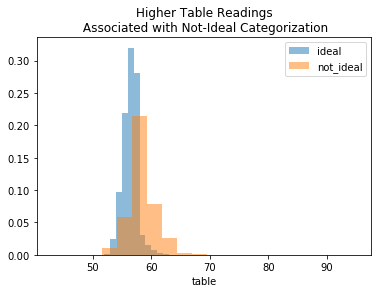

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(ideal['table'], normed=True, alpha=.5, bins = 20)
ax.hist(not_ideal['table'], normed=True, alpha=.5, bins=20)
ax.legend(['ideal','not_ideal'])
ax.set_xlabel('table')
ax.set_title('Higher Table Readings\n Associated with Not-Ideal Categorization');

# Train Test Split

We have a healthy dataset here, as far as records go.  There are almost 54,000 records.

In [9]:
diamonds.shape

(53940, 10)

In the cell below, split the data with a test size of 20%.   
Starter code:  
`X_train, X_test, y_train, y_test = `  

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
#__SOLUTION__
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diamonds.drop('cut', axis=1), diamonds['cut'], test_size=.2, random_state=42)

In [15]:
# a 20% test step still leaves over 10,000 records for the test
y_test.shape

(10788,)

In [16]:
assert y_test.shape == (10788,)

# Cross Validation

Now that we have split off the test set, we can experiment with the train set. We will use cross-validation to split shuffle the training data, as shown in the diagram below.

![cross_val](images/grid_search_cross_validation.png)

If we were only using a single train test split, we could start to find our best model by looking at the training and test scores.

Let's build a dummy classifier and a logistic regression classifier using this method.

In [30]:
# Never fit on the test set
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train, y_train)


0.5196514645902856

In [1]:
# Look at the difference between Train and test in order to diagnose bias variance trade off

In [32]:
dc.score(X_train, y_train)

0.5212041156840934

In [33]:
dc.score(X_test, y_test)

0.5232665925101965

Now fit a logistic regression model

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 26546 to 15795
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    43152 non-null  float64 
 1   color    43152 non-null  category
 2   clarity  43152 non-null  category
 3   depth    43152 non-null  float64 
 4   table    43152 non-null  float64 
 5   price    43152 non-null  int64   
 6   x        43152 non-null  float64 
 7   y        43152 non-null  float64 
 8   z        43152 non-null  float64 
dtypes: category(2), float64(6), int64(1)
memory usage: 2.7 MB


In [48]:
X_train_numerical = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numerical = X_test.select_dtypes(include=['float64', 'int64'])

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_numerical, y_train)

LogisticRegression()

In [50]:
lr.score(X_train_numerical, y_train)

0.7719688542825361

In [54]:
lr.score(X_test_numerical, y_test)

0.7713199851687059

# Cross validation

# Cross validation with a hold out set

# Pipelines

# Pipelines and Class Imbalance